### Comportamiento de la Demanda

In [2]:
import sys
import os
from pydataxm.pydatasimem import ReadSIMEM, CatalogSIMEM
import pandas as pd
from pydataxm import *
import datetime as dt

import base64
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
from email.message import EmailMessage

import pandas as pd
import psycopg2 as bd
import holidays_co
from datetime import datetime
import numpy as np
import os
from google.cloud import bigquery
from google.oauth2 import service_account
from openpyxl import load_workbook
import shutil
import matplotlib.pyplot as plt
import io
import base64
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
from email.message import EmailMessage

In [3]:
def conexion_bd():
    # Ruta al archivo JSON de credenciales (ajústala según la ubicación real)
    json_key_path = "C:/BigQuery/kmartinez-tbsg.json"

    try:
        # Autenticación y conexión a BigQuery
        credentials = service_account.Credentials.from_service_account_file(json_key_path)
        client = bigquery.Client(credentials=credentials, project="enersinc-tbsg-bq")
        
        # Verificar la conexión listando datasets disponibles
        datasets = list(client.list_datasets())
        version = f"Conectado a BigQuery. Datasets disponibles: {[dataset.dataset_id for dataset in datasets]}"
        
        return True, version, client
    except Exception as e:
        print(f"Error al conectar a BigQuery: {e}")  # Imprimir el error
        return False, f"Error: no se pudo conectar con la base de datos... {str(e)}", None

In [4]:
# Realizando las consultas en la API
objetoAPI = pydataxm.ReadDB()
df_demsist = objetoAPI.request_data('DemaCome','Sistema',dt.date(2025,2,1),dt.date(2025,12,9))
df_demsist_hist = objetoAPI.request_data('DemaCome','Sistema',dt.date(2024,11,1),dt.date(2024,12,9))
df_demmerc = objetoAPI.request_data('DemaCome','MercadoComercializacion',dt.date(2025,11,1),dt.date(2025,12,9))

ContentTypeError: 400, message='Attempt to decode JSON with unexpected mimetype: text/plain; charset=utf-8', url='https://servapibi.xm.com.co/hourly'

In [4]:
df_demsist = objetoAPI.request_data('DemaCome','Sistema',dt.date(2025,2,1),dt.date(2025,12,9))

In [5]:
df_demsist_hist = objetoAPI.request_data('DemaCome','Sistema',dt.date(2024,11,1),dt.date(2024,12,9))

In [6]:
df_demmerc = objetoAPI.request_data('DemaCome','MercadoComercializacion',dt.date(2025,11,1),dt.date(2025,12,9))

In [11]:
df_demmerc

,Id,Values_code,Values_MarketType,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,MercadoComercializacion,ANTIOQUIA,NO REGULADO,365845.27,367635.34,359305.23,356745.70,366824.20,368203.34,362311.83,...,356473.68,348318.19,337869.04,352570.30,343901.20,335236.11,317608.92,313517.46,303235.88,2025-11-01
1,MercadoComercializacion,ANTIOQUIA,REGULADO,741973.92,694946.32,669407.15,663577.72,685982.80,723869.80,804043.72,...,1080341.03,1067267.34,1081553.24,1145340.89,1121509.03,1065541.64,986608.47,898897.20,820434.36,2025-11-01
2,MercadoComercializacion,ARAUCA,NO REGULADO,73270.13,73635.33,73712.35,74458.15,73879.35,73400.03,72936.84,...,73871.25,74338.61,74773.04,74458.19,74165.87,74220.82,74116.78,73616.51,73090.93,2025-11-01
3,MercadoComercializacion,ARAUCA,REGULADO,34445.23,32925.68,31868.80,31019.40,30536.42,32468.27,32833.52,...,48214.15,44609.80,42942.27,45845.22,47339.53,46935.78,45367.40,44024.36,41534.84,2025-11-01
4,MercadoComercializacion,BAJO PUTUMAYO,NO REGULADO,177.41,173.94,166.83,163.92,156.71,171.35,191.16,...,298.39,272.94,255.78,220.53,226.10,205.71,201.45,190.81,185.55,2025-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,MercadoComercializacion,QUINDIO,REGULADO,2484.09,2477.40,2479.77,2473.54,2470.08,2471.43,2458.58,...,2458.74,2457.57,2462.49,2469.11,2468.80,2468.46,2465.34,2468.89,2467.43,2025-11-28
1503,MercadoComercializacion,SANTANDER,REGULADO,41561.37,41576.23,41561.40,41571.86,41553.45,41565.38,41802.43,...,47749.45,43237.77,41592.08,41494.98,41518.94,41516.26,41480.35,41476.45,41448.89,2025-11-28
1504,MercadoComercializacion,TOLIMA,REGULADO,145525.06,144072.29,143869.15,146087.11,147567.77,147219.71,151008.02,...,177282.48,162028.61,147591.75,158000.25,156709.52,155905.93,141493.08,140169.42,139346.06,2025-11-28
1505,MercadoComercializacion,TULUA,REGULADO,8139.30,8601.15,8417.47,8360.34,8578.55,8737.98,8040.18,...,9117.70,9534.80,10086.76,9424.34,9225.81,10215.61,10156.50,10507.16,10274.36,2025-11-28


In [5]:
df_demmerc.to_csv('prueba_costa.csv')

In [7]:
# --- DEMANDA --- 
# transformando query de demanda

dft_demmerc = df_demmerc.copy()
cond_mar = dft_demmerc['Values_code'] == 'CARIBE MAR'
cond_sol = dft_demmerc['Values_code'] == 'CARIBE SOL'
dft_demmerc = dft_demmerc[cond_mar | cond_sol]
# dft_demmerc.tail()
dft_demmerc = dft_demmerc.melt(id_vars=['Id','Values_code','Date','Values_MarketType'],ignore_index=False,var_name='periodo',value_name='DemCaribe_kwh')
dft_demmerc_count = dft_demmerc.copy()
dft_demmerc_count = dft_demmerc_count[['Date','DemCaribe_kwh']]
dft_demmerc = dft_demmerc[['Date','periodo','DemCaribe_kwh']]
dft_demmerc = dft_demmerc.groupby(by=['Date','periodo']).sum().reset_index()
dft_demmerc = dft_demmerc[['Date','DemCaribe_kwh']]

# creando copia
dft_count = dft_demmerc_count.copy()

# verificando información
dft_count = dft_count.groupby(by='Date').count().reset_index()
cond = dft_count['DemCaribe_kwh'] == 96
dft_count = dft_count[cond]
fecha_final = dft_count['Date'].max()

# seleccionando la información correcta
# Agrupar por 'Date' y aplicar sum, max y min a las columnas numéricas
dft_demmerc = dft_demmerc.groupby('Date').agg(['sum', 'max', 'min','mean']).reset_index()

cond_fecfin = dft_demmerc['Date'] <= fecha_final
dft_demmerc = dft_demmerc[cond_fecfin]

# Aplanar columnas si lo necesitas
dft_demmerc.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in dft_demmerc.columns]

dft_demmerc.tail()

,Date_,DemCaribe_kwh_sum,DemCaribe_kwh_max,DemCaribe_kwh_min,DemCaribe_kwh_mean
29,2025-11-30,60231453.05,2897666.74,2168178.54,2.509644e+06
30,2025-12-01,63662542.63,2852562.31,2336186.49,2.652606e+06
31,2025-12-02,63947828.75,2974299.66,2260564.53,2.664493e+06
32,2025-12-03,65344890.18,3038202.32,2347965.02,2.722704e+06
33,2025-12-04,65590603.49,3036827.20,2326425.27,2.732942e+06


In [8]:
# 1. conexión a la base de datos
val, version, client  = conexion_bd()

# buscando query de máxima versión
query_pron_sin = """
    SELECT
    fechaoperacion,
    hora,
    SUM(CASE
        WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 2 THEN lun   -- lunes
        WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 3 THEN mar   -- martes
        WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 4 THEN mie   -- miércoles
        WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 5 THEN jue   -- jueves
        WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 6 THEN vie   -- viernes
        WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 7 THEN sab   -- sábado
        WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 1 THEN dom   -- domingo
    END) AS demanda
    FROM (
    SELECT
        fecha_dia AS fechaoperacion,
        hora,
        CAST(dia1 AS FLOAT64) AS lun,
        CAST(dia2 AS FLOAT64) AS mar,
        CAST(di3 AS FLOAT64) AS mie,
        CAST(dia4 AS FLOAT64) AS jue,
        CAST(dia5 AS FLOAT64) AS vie,
        CAST(dia6 AS FLOAT64) AS sab,
        CAST(dia7 AS FLOAT64) AS dom
    FROM `enersinc-tbsg-bq.tbsg.public_pron_sin`,
    UNNEST([
        fechaoperacion,
        DATE_ADD(fechaoperacion, INTERVAL 1 DAY),
        DATE_ADD(fechaoperacion, INTERVAL 2 DAY),
        DATE_ADD(fechaoperacion, INTERVAL 3 DAY),
        DATE_ADD(fechaoperacion, INTERVAL 4 DAY),
        DATE_ADD(fechaoperacion, INTERVAL 5 DAY),
        DATE_ADD(fechaoperacion, INTERVAL 6 DAY)
    ]) AS fecha_dia
    WHERE fechaoperacion >= DATE '2025-01-01'
    ) t1
    GROUP BY fechaoperacion, hora
    ORDER BY fechaoperacion, hora;
"""

query_pron_areas_caribe = """
  SELECT
  fechaoperacion,
  hora,
  SUM(
      CASE
      WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 2 THEN lun
      WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 3 THEN mar
      WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 4 THEN mie
      WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 5 THEN jue
      WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 6 THEN vie
      WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 7 THEN sab
      WHEN EXTRACT(DAYOFWEEK FROM fechaoperacion) = 1 THEN dom
      END
  ) AS demanda
  FROM (
  SELECT
      fecha_offset AS fechaoperacion,
      hora,
      CAST(dia1 AS FLOAT64) AS lun,
      CAST(dia2 AS FLOAT64) AS mar,
      CAST(dia3 AS FLOAT64) AS mie,
      CAST(dia4 AS FLOAT64) AS jue,
      CAST(dia5 AS FLOAT64) AS vie,
      CAST(dia6 AS FLOAT64) AS sab,
      CAST(dia7 AS FLOAT64) AS dom
  FROM `enersinc-tbsg-bq`.tbsg.public_pron_areas,
  UNNEST([
      DATE(fechaoperacion),
      DATE_ADD(DATE(fechaoperacion), INTERVAL 1 DAY),
      DATE_ADD(DATE(fechaoperacion), INTERVAL 2 DAY),
      DATE_ADD(DATE(fechaoperacion), INTERVAL 3 DAY),
      DATE_ADD(DATE(fechaoperacion), INTERVAL 4 DAY),
      DATE_ADD(DATE(fechaoperacion), INTERVAL 5 DAY),
      DATE_ADD(DATE(fechaoperacion), INTERVAL 6 DAY)
  ]) AS fecha_offset
  WHERE DATE(fechaoperacion) BETWEEN DATE '2025-01-01' AND DATE '2025-12-31'
      AND (
      (fechaoperacion < DATE '2025-05-01' AND UPPER(area) IN ('SUBATLANTICO','SUBBOLIVAR','SUBCERROMATOSO','SUBCORDOBA-SUCRE','SUBGCM')) OR
      (fechaoperacion >= DATE '2025-05-01' AND area IN ('SubGCM', 'SubCerromatoso', 'SubAtlantico', 'SubBolivar', 'SubCordoba-Sucre'))
    )
  ) t1
  GROUP BY fechaoperacion, hora
  ORDER BY fechaoperacion desc, hora;"""

query_pron_ddem = """
  SELECT
    fechaoperacion,
    hora,
    SUM(CASE WHEN area = 'Total' THEN valor END) AS total_sin,
    SUM(CASE WHEN area <> 'Total' THEN valor END) AS total_costa,
    SUM(CASE 
          WHEN fechaoperacion < DATE '2025-05-01' AND area IN ('ATLANTIC', 'BOLIVAR', 'GCM') THEN valor
          WHEN fechaoperacion >= DATE '2025-05-01' AND area IN ('SubArea Atlantico', 'SubArea Bolivar', 'SubArea GCM') THEN valor
        END) AS total_caribe2,
    SAFE_DIVIDE(
      SUM(CASE WHEN area <> 'Total' THEN valor END),
      SUM(CASE WHEN area = 'Total' THEN valor END)
    ) AS porc
  FROM (
    SELECT
      fechaoperacion,
      nombre AS area,
      hora_val.hora,
      hora_val.valor
    FROM `enersinc-tbsg-bq`.tbsg.public_ddem,
    UNNEST([
      STRUCT(1 AS hora, CAST(hora1 AS FLOAT64) AS valor),
      STRUCT(2 AS hora, CAST(hora2 AS FLOAT64)),
      STRUCT(3 AS hora, CAST(hora3 AS FLOAT64)),
      STRUCT(4 AS hora, CAST(hora4 AS FLOAT64)),
      STRUCT(5 AS hora, CAST(hora5 AS FLOAT64)),
      STRUCT(6 AS hora, CAST(hora6 AS FLOAT64)),
      STRUCT(7 AS hora, CAST(hora7 AS FLOAT64)),
      STRUCT(8 AS hora, CAST(hora8 AS FLOAT64)),
      STRUCT(9 AS hora, CAST(hora9 AS FLOAT64)),
      STRUCT(10 AS hora, CAST(hora10 AS FLOAT64)),
      STRUCT(11 AS hora, CAST(hora11 AS FLOAT64)),
      STRUCT(12 AS hora, CAST(hora12 AS FLOAT64)),
      STRUCT(13 AS hora, CAST(hora13 AS FLOAT64)),
      STRUCT(14 AS hora, CAST(hora14 AS FLOAT64)),
      STRUCT(15 AS hora, CAST(hora15 AS FLOAT64)),
      STRUCT(16 AS hora, CAST(hora16 AS FLOAT64)),
      STRUCT(17 AS hora, CAST(hora17 AS FLOAT64)),
      STRUCT(18 AS hora, CAST(hora18 AS FLOAT64)),
      STRUCT(19 AS hora, CAST(hora19 AS FLOAT64)),
      STRUCT(20 AS hora, CAST(hora20 AS FLOAT64)),
      STRUCT(21 AS hora, CAST(hora21 AS FLOAT64)),
      STRUCT(22 AS hora, CAST(hora22 AS FLOAT64)),
      STRUCT(23 AS hora, CAST(hora23 AS FLOAT64)),
      STRUCT(24 AS hora, CAST(hora24 AS FLOAT64))
    ]) AS hora_val
    WHERE fechaoperacion BETWEEN DATE '2025-01-01' AND DATE '2025-12-31'
      AND (
        (fechaoperacion < DATE '2025-05-01' AND nombre IN ('Total', 'ATLANTIC', 'BOLIVAR', 'CERROMAT', 'CORDOSUC', 'GCM')) OR
        (fechaoperacion >= DATE '2025-05-01' AND nombre IN ('Total', 'SubArea Atlantico', 'SubArea Cerromatoso', 'SubArea Bolivar', 'SubArea GCM', 'SubArea Cordoba_Sucre'))
      )
  ) t1
  GROUP BY fechaoperacion, hora
  ORDER BY fechaoperacion, hora;"""



In [9]:
# graficas SIN
# pron_sin
dfo_pron_sin = client.query(query_pron_sin).to_dataframe()
dft_pron_sin = dfo_pron_sin.copy()
dft_pron_sin = dft_pron_sin[['fechaoperacion','demanda']]
dft_pron_sin.columns = ['Date','pron_sin']
dft_pron_sin = dft_pron_sin.groupby(by='Date').sum().reset_index()
dft_pron_sin['Date'] = pd.to_datetime(dft_pron_sin['Date'],errors='coerce',format='%Y-%m-%d')

# ddem
dfo_ddem = client.query(query_pron_ddem).to_dataframe()
dft_ddem = dfo_ddem.copy()
dft_ddem = dft_ddem[['fechaoperacion','total_sin']]
dft_ddem.columns = ['Date','DDEM']
dft_ddem = dft_ddem.groupby(by='Date').sum().reset_index()
dft_ddem['Date'] = pd.to_datetime(dft_ddem['Date'],errors='coerce',format='%Y-%m-%d')

# transformado sistema
dft_demsis = df_demsist.copy()
dft_demhist = df_demsist_hist.copy()

dft_demsis = dft_demsis.melt(id_vars=['Id','Values_code','Date'],ignore_index=False,var_name='periodo',value_name='DemSist_kwh')
dft_demsis = dft_demsis[['Date','DemSist_kwh']]
dft_demsis = dft_demsis.groupby(by='Date').sum().reset_index()
dft_demsis['Date'] = pd.to_datetime(dft_demsis['Date'],errors='coerce',format='%Y-%m-%d')
dft_demsis = dft_demsis.merge(dft_pron_sin, on='Date', how='left') \
                        .merge(dft_ddem,on='Date',how='left')
dft_demsis['Date'] = dft_demsis['Date'].dt.strftime('%d-%b')
dft_demsis.columns = ['Date','DemSist_kwh_2025','Pron_sin','DDEM']

dft_demhist = dft_demhist.melt(id_vars=['Id','Values_code','Date'],ignore_index=False,var_name='periodo',value_name='DemSist_kwh')
dft_demhist = dft_demhist[['Date','DemSist_kwh']]
dft_demhist = dft_demhist.groupby(by='Date').sum().reset_index()
dft_demhist['Date'] = dft_demhist['Date'].dt.strftime('%d-%b')
dft_demhist.columns = ['Date','DemSist_kwh_2024']

dft_demsis = dft_demsis.merge(dft_demhist, on='Date', how='left')
dft_demsis


,Date,DemSist_kwh_2025,Pron_sin,DDEM,DemSist_kwh_2024
0,01-Feb,2.285705e+08,216964.688158,221861.63,NaN
1,02-Feb,2.095135e+08,200488.979546,206012.27,NaN
2,03-Feb,2.412904e+08,237857.791598,237214.93,NaN
3,04-Feb,2.424251e+08,242018.419727,241556.60,NaN
4,05-Feb,2.451406e+08,243620.137728,241170.77,NaN
...,...,...,...,...,...
304,02-Dec,2.376975e+08,242781.937765,243285.70,2.426060e+08
305,03-Dec,2.414289e+08,243746.306402,240930.21,2.455696e+08
306,04-Dec,2.416840e+08,244189.339260,240807.00,2.473278e+08
307,05-Dec,4.967570e+07,243177.439013,242700.42,2.473625e+08


In [10]:
# pron areas
dfo_pron_areas = client.query(query_pron_areas_caribe).to_dataframe()
dft_pron_areas = dfo_pron_areas.copy()
dft_pron_areas = dft_pron_areas[['fechaoperacion','demanda']]
dft_pron_areas.columns = ['Date_','pron_areas']
dft_pron_areas = dft_pron_areas.groupby(by='Date_').sum().reset_index()
dft_pron_areas['Date_'] = pd.to_datetime(dft_pron_areas['Date_'],errors='coerce',format='%Y-%m-%d')

# ddem
dfo_ddem = client.query(query_pron_ddem).to_dataframe()
dft_ddem = dfo_ddem.copy()
dft_ddem = dft_ddem[['fechaoperacion','total_costa']]
dft_ddem.columns = ['Date_','DDEM']
dft_ddem = dft_ddem.groupby(by='Date_').sum().reset_index()
dft_ddem['Date_'] = pd.to_datetime(dft_ddem['Date_'],errors='coerce',format='%Y-%m-%d')

dft_demmerc['Date_'] = pd.to_datetime(dft_demmerc['Date_'],errors='coerce',format='%Y-%m-%d')
dft_demmerc = dft_demmerc.merge(dft_pron_areas, on='Date_', how='left') \
                            .merge(dft_ddem, on='Date_', how='left')
dft_demmerc

,Date_,DemCaribe_kwh_sum,DemCaribe_kwh_max,DemCaribe_kwh_min,DemCaribe_kwh_mean,pron_areas,DDEM
0,2025-11-01,68340541.93,3194276.06,2397685.47,2.847523e+06,66382.191603,66038.881
1,2025-11-02,66277928.17,3121621.10,2364366.23,2.761580e+06,64179.453912,63700.686
2,2025-11-03,66858455.79,3186527.60,2461343.38,2.785769e+06,64009.843361,63668.124
3,2025-11-04,68462622.28,3226927.99,2350872.68,2.852609e+06,68643.339542,68356.897
4,2025-11-05,67827171.67,3249810.26,2338791.49,2.826132e+06,68162.048811,68046.210
5,2025-11-06,68542513.50,3209155.46,2432618.09,2.855938e+06,69131.725020,68524.609
6,2025-11-07,70345196.70,3304475.57,2412838.35,2.931050e+06,69026.083871,68740.760
7,2025-11-08,71083191.58,3298441.67,2535768.35,2.961800e+06,67581.193566,67466.620
8,2025-11-09,69159831.60,3302847.35,2439447.24,2.881660e+06,65739.874589,65120.390
9,2025-11-10,69741307.16,3175554.44,2499175.95,2.905888e+06,68313.996508,68159.070


In [11]:
# Graficas SIN
dft_demsis.tail(10)

,Date,DemSist_kwh_2025,Pron_sin,DDEM,DemSist_kwh_2024
299,27-Nov,2.493600e+08,243368.701255,242487.17,2.418411e+08
300,28-Nov,2.414715e+08,242474.410585,241974.76,2.423207e+08
301,29-Nov,2.234192e+08,231022.927283,230262.13,2.437768e+08
302,30-Nov,2.096810e+08,211018.702306,211697.53,2.321337e+08
303,01-Dec,2.324514e+08,238620.414376,238939.73,2.187018e+08
304,02-Dec,2.376975e+08,242781.937765,243285.70,2.426060e+08
305,03-Dec,2.414289e+08,243746.306402,240930.21,2.455696e+08
306,04-Dec,2.416840e+08,244189.339260,240807.00,2.473278e+08
307,05-Dec,4.967570e+07,243177.439013,242700.42,2.473625e+08
308,06-Dec,5.386510e+07,230134.433373,231593.76,2.459550e+08


In [17]:
dft_demsis['DemSist_kwh_2025'].mean()

np.float64(230280848.86285713)

In [21]:
dft_demmerc.tail()

,Date_,DemCaribe_kwh_sum,DemCaribe_kwh_max,DemCaribe_kwh_min,DemCaribe_kwh_mean,pron_areas,DDEM
21,2025-11-22,68887170.22,3158328.67,2506259.26,2.870299e+06,68502.061157,68370.550
22,2025-11-23,65274879.29,3112619.94,2297892.64,2.719787e+06,66637.092178,66168.075
23,2025-11-24,69460744.01,3230400.34,2504739.62,2.894198e+06,69980.272696,69843.250
24,2025-11-25,69777368.15,3266557.70,2475524.95,2.907390e+06,70128.791454,69833.752
25,2025-11-26,70378753.66,3276265.09,2536255.47,2.932448e+06,70390.857269,70292.710


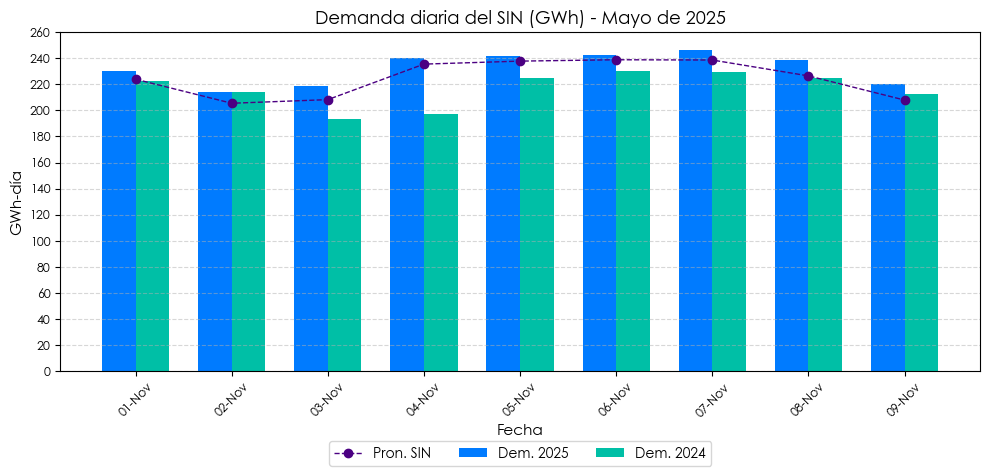

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.ticker as ticker

# Establecer fuente
matplotlib.rcParams['font.family'] = 'Century Gothic'

# Copiar y convertir columnas
df = dft_demsis.copy()
df['DemSist_GWh_2025'] = df['DemSist_kwh_2025'] / 1_000_000
df['DemSist_GWh_2024'] = df['DemSist_kwh_2024'] / 1_000_000
df['Pron_sin_GWh'] = df['Pron_sin'] / 1_000
df['Date_dt'] = pd.to_datetime(df['Date'] + '-2025', format='%d-%b-%Y')

# Fechas
fecha_inicial = pd.to_datetime('2025-11-01')
fecha_final = pd.to_datetime('2025-11-09')
df_filtrado = df[(df['Date_dt'] >= fecha_inicial) & (df['Date_dt'] <= fecha_final)]

# Valores para el eje X
x = df_filtrado['Date_dt']
x_labels = df_filtrado['Date']
x_indexes = range(len(x))

# Colores
color_2025 = '#007BFF'  # Azul moderno
color_2024 = '#00BFA6'  # Azul armonioso
color_pron = '#4B0082'  # morado para línea

# Crear figura
plt.figure(figsize=(10, 5))
bar_width = 0.35

# Barras
plt.bar([i - bar_width/2 for i in x_indexes], df_filtrado['DemSist_GWh_2025'],
        width=bar_width, label='Dem. 2025', color=color_2025)
plt.bar([i + bar_width/2 for i in x_indexes], df_filtrado['DemSist_GWh_2024'],
        width=bar_width, label='Dem. 2024', color=color_2024)

# Línea de Pronóstico
plt.plot(x_indexes, df_filtrado['Pron_sin_GWh'], color=color_pron,
         marker='o', linewidth=1, linestyle='--', label='Pron. SIN')

# Fuente
font = {'fontname': 'Century Gothic'}

# Ejes y etiquetas
plt.xticks(ticks=x_indexes, labels=x_labels, rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('GWh-día', fontsize=11)
plt.xlabel('Fecha', fontsize=11)
plt.title('Demanda diaria del SIN (GWh) - Mayo de 2025', fontsize=13, **font)

# Leyenda en la parte inferior
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

# Limitar y-ticks
y_max = np.ceil(max(df_filtrado[['DemSist_GWh_2025', 'DemSist_GWh_2024', 'Pron_sin_GWh']].max()) / 20) * 20
plt.yticks(np.arange(0, y_max + 1, 20))

# Líneas de grilla suaves
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar layout
plt.tight_layout()
plt.show()


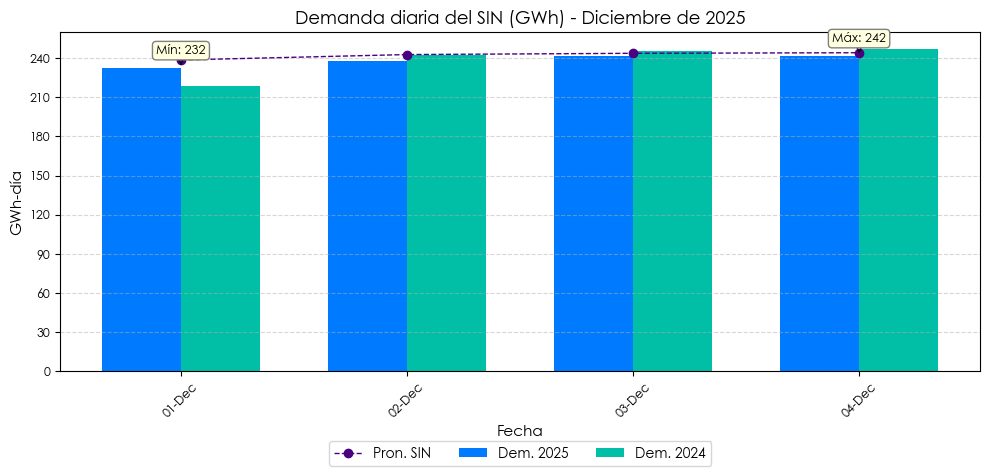

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

# Establecer fuente
matplotlib.rcParams['font.family'] = 'Century Gothic'

# Copiar y convertir columnas
df = dft_demsis.copy()
df['DemSist_GWh_2025'] = df['DemSist_kwh_2025'] / 1_000_000
df['DemSist_GWh_2024'] = df['DemSist_kwh_2024'] / 1_000_000
df['Pron_sin_GWh'] = df['Pron_sin'] / 1_000
df['Date_dt'] = pd.to_datetime(df['Date'] + '-2025', format='%d-%b-%Y')

# Fechas
fecha_inicial = pd.to_datetime('2025-12-01')
fecha_final = pd.to_datetime('2025-12-04')
df_filtrado = df[(df['Date_dt'] >= fecha_inicial) & (df['Date_dt'] <= fecha_final)]

# Valores para el eje X
x = df_filtrado['Date_dt']
x_labels = df_filtrado['Date']
x_indexes = range(len(x))

# Colores
color_2025 = '#007BFF'  # Azul moderno
color_2024 = '#00BFA6'  # Azul armonioso
color_pron = '#4B0082'  # morado para línea

# Crear figura
plt.figure(figsize=(10, 5))
bar_width = 0.35

# Barras
plt.bar([i - bar_width/2 for i in x_indexes], df_filtrado['DemSist_GWh_2025'],
        width=bar_width, label='Dem. 2025', color=color_2025)
plt.bar([i + bar_width/2 for i in x_indexes], df_filtrado['DemSist_GWh_2024'],
        width=bar_width, label='Dem. 2024', color=color_2024)

# Línea de Pronóstico
plt.plot(x_indexes, df_filtrado['Pron_sin_GWh'], color=color_pron,
         marker='o', linewidth=1, linestyle='--', label='Pron. SIN')

# Fuente
font = {'fontname': 'Century Gothic'}

# Ejes y etiquetas
plt.xticks(ticks=x_indexes, labels=x_labels, rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('GWh-día', fontsize=11)
plt.xlabel('Fecha', fontsize=11)
plt.title('Demanda diaria del SIN (GWh) - Diciembre de 2025', fontsize=13, **font)

# Leyenda en la parte inferior
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

# Limitar y-ticks
y_max = np.ceil(max(df_filtrado[['DemSist_GWh_2025', 'DemSist_GWh_2024', 'Pron_sin_GWh']].max()) / 20) * 20
plt.yticks(np.arange(0, y_max + 1, 20))

# Líneas de grilla suaves
plt.grid(axis='y', linestyle='--', alpha=0.5)

# --- Aquí calculamos índices para mín, máx y último de demanda 2025 ---
idx_min = df_filtrado['DemSist_GWh_2025'].idxmin()
idx_max = df_filtrado['DemSist_GWh_2025'].idxmax()

# Convertimos esos índices para ubicarlos en x_indexes (posición relativa)
pos_min = df_filtrado.index.get_loc(idx_min)
pos_max = df_filtrado.index.get_loc(idx_max)

# Agregar etiquetas con fondo y sin decimales
for pos, label in zip([pos_min, pos_max], ['Mín', 'Máx']):
    x_pos = pos
    y_val = df_filtrado['DemSist_GWh_2025'].iloc[pos]
    x_label = x_labels.iloc[pos]
    plt.annotate(f'{label}: {y_val:.0f}', 
                 xy=(x_pos, y_val), xytext=(0, 10), textcoords='offset points',
                 ha='center', fontsize=9, color='black',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", edgecolor="gray"),
                 arrowprops=dict(arrowstyle='->', lw=0.8))

# Solo valores enteros en el eje Y
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()


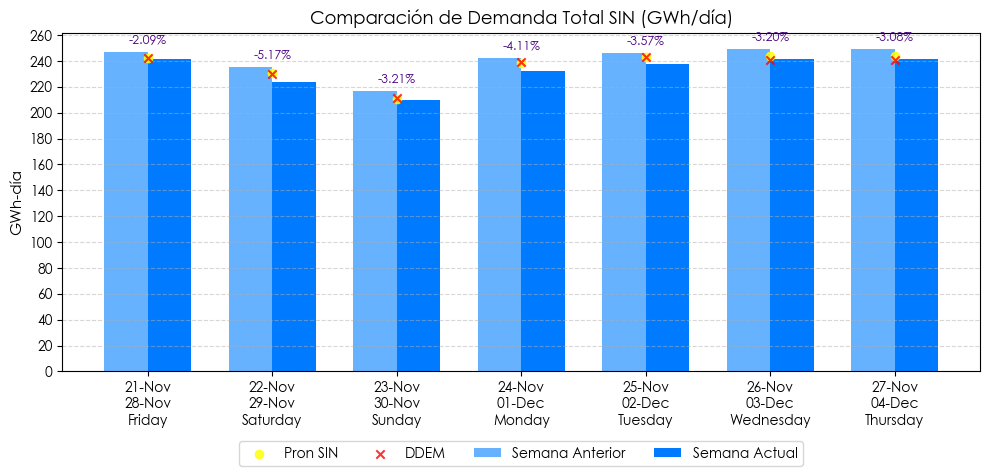

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime, timedelta

df = dft_demsis.copy()

# DataFrame simulado (reemplaza por tu DataFrame real)
df['Date'] = pd.to_datetime(df['Date'] + '-2025', format='%d-%b-%Y')

# Define la fecha final
fecha_final = pd.to_datetime(fecha_final)  # <- cámbiala según necesites

# Extrae los últimos 14 días a partir de la fecha_final
df_filtrado = df[df['Date'] <= fecha_final].sort_values('Date').tail(14).copy()

# Separar en semana actual (últimos 7 días) y semana anterior
semana_anterior = df_filtrado.iloc[:7].copy()
semana_actual = df_filtrado.iloc[7:].copy()

# Convertir a GWh
semana_anterior['GWh'] = semana_anterior['DemSist_kwh_2025'] / 1e6
semana_actual['GWh'] = semana_actual['DemSist_kwh_2025'] / 1e6

# Eje X con día de la semana completo y fechas
etiquetas = [f"{d1.strftime('%d-%b')}\n{d2.strftime('%d-%b')}\n{d2.strftime('%A')}" 
             for d1, d2 in zip(semana_anterior['Date'], semana_actual['Date'])]

# Colores definidos
color_2025 = '#66B2FF'  # Azul moderno (semana anterior)
color_2024 = '#007BFF' #007BFF # Azul claro armonioso (semana actual)
color_pron = '#4B0082'  # Morado para texto

# Fuente
font = {'fontname': 'Century Gothic'}

# Gráfico
fig, ax = plt.subplots(figsize=(10, 5))
x = range(len(etiquetas))
bar_width = 0.35

# Barras
b1 = ax.bar([i - bar_width/2 for i in x], semana_anterior['GWh'], width=bar_width, color=color_2025, label='Semana Anterior')
b2 = ax.bar([i + bar_width/2 for i in x], semana_actual['GWh'], width=bar_width, color=color_2024, label='Semana Actual')

# Variaciones porcentuales
for i in x:
    ant = semana_anterior.iloc[i]['GWh']
    act = semana_actual.iloc[i]['GWh']
    if ant != 0:
        pct = (act - ant) / ant * 100
        ax.text(i, max(act, ant) + 5, f"{pct:+.2f}%", ha='center', va='bottom', fontsize=9, color=color_pron, **font)

# Ejes y estilo
ax.set_xticks(x)
ax.set_xticklabels(etiquetas, fontsize=10, **font)
ax.set_ylabel("GWh-día", fontsize=11, **font)
ax.set_title("Comparación de Demanda Total SIN (GWh/día)", fontsize=13, **font)
ax.legend(prop={'family': 'Century Gothic'})

# Nuevos colores translúcidos
color_pron_marker = 'yellow'  # Amarillo para Pron_sin
color_ddem_marker = 'red'  # Rojo para DDEM

# Marcaciones Pron_sin y DDEM (en GWh) con transparencia
pron = semana_actual['Pron_sin'] / 1_000
ddem = semana_actual['DDEM'] / 1_000

# Puntos con transparencia
ax.scatter(x, pron, color=color_pron_marker, marker='o', label='Pron SIN', alpha=0.8, zorder=5)
ax.scatter(x, ddem, color=color_ddem_marker, marker='x', label='DDEM', alpha=0.8, zorder=5)


# Eje Y cada 20
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Leyenda en la parte inferior
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4)

# Líneas de grilla suaves
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


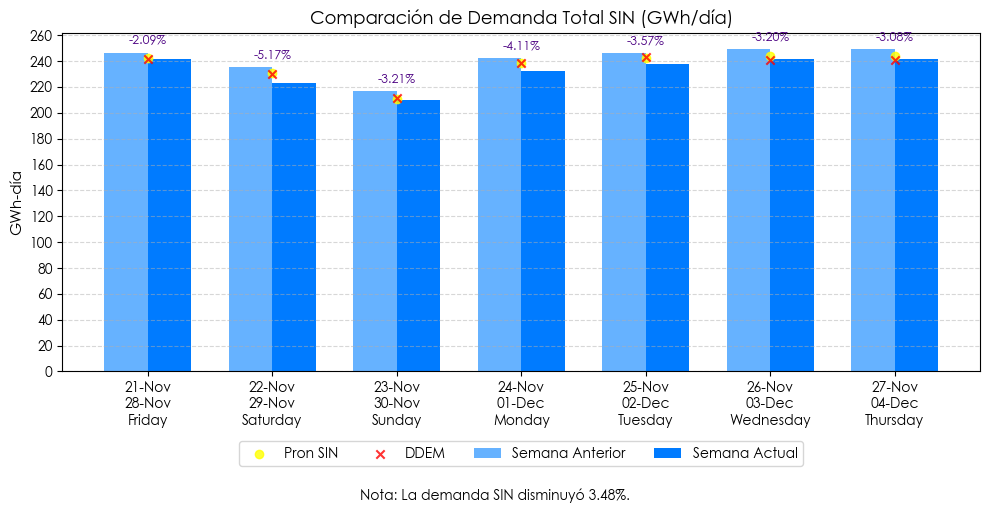

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime, timedelta

df = dft_demsis.copy()

# Conversión de fechas
df['Date'] = pd.to_datetime(df['Date'] + '-2025', format='%d-%b-%Y')

# Define la fecha final
fecha_final = pd.to_datetime(fecha_final)  # <- cámbiala según necesites

# Filtrar últimos 14 días
df_filtrado = df[df['Date'] <= fecha_final].sort_values('Date').tail(14).copy()

# Separar en semanas
semana_anterior = df_filtrado.iloc[:7].copy()
semana_actual = df_filtrado.iloc[7:].copy()

# Convertir a GWh
semana_anterior['GWh'] = semana_anterior['DemSist_kwh_2025'] / 1e6
semana_actual['GWh'] = semana_actual['DemSist_kwh_2025'] / 1e6

# Etiquetas eje X
etiquetas = [f"{d1.strftime('%d-%b')}\n{d2.strftime('%d-%b')}\n{d2.strftime('%A')}" 
             for d1, d2 in zip(semana_anterior['Date'], semana_actual['Date'])]

# Colores y fuentes
color_2025 = '#66B2FF'  # Azul semana anterior
color_2024 = '#007BFF'  # Azul semana actual
color_pron = '#4B0082'
color_pron_marker = 'yellow'
color_ddem_marker = 'red'
font = {'fontname': 'Century Gothic'}

# Gráfico
fig, ax = plt.subplots(figsize=(10, 5))
x = range(len(etiquetas))
bar_width = 0.35

# Barras
ax.bar([i - bar_width/2 for i in x], semana_anterior['GWh'], width=bar_width, color=color_2025, label='Semana Anterior')
ax.bar([i + bar_width/2 for i in x], semana_actual['GWh'], width=bar_width, color=color_2024, label='Semana Actual')

# Variaciones porcentuales diarias
for i in x:
    ant = semana_anterior.iloc[i]['GWh']
    act = semana_actual.iloc[i]['GWh']
    if ant != 0:
        pct = (act - ant) / ant * 100
        ax.text(i, max(act, ant) + 5, f"{pct:+.2f}%", ha='center', va='bottom', fontsize=9, color=color_pron, **font)

# Variación porcentual total semanal
suma_ant = semana_anterior['GWh'].sum()
suma_act = semana_actual['GWh'].sum()
pct_total = (suma_act - suma_ant) / suma_ant * 100
texto_nota = f"Nota: La demanda SIN {'aumentó' if pct_total > 0 else 'disminuyó'} {abs(pct_total):.2f}%."

# Etiquetas y estilo
ax.set_xticks(x)
ax.set_xticklabels(etiquetas, fontsize=10, **font)
ax.set_ylabel("GWh-día", fontsize=11, **font)
ax.set_title("Comparación de Demanda Total SIN (GWh/día)", fontsize=13, **font)

# Leyenda
ax.legend(prop={'family': 'Century Gothic'})

# Pronóstico y DDEM
pron = semana_actual['Pron_sin'] / 1_000
ddem = semana_actual['DDEM'] / 1_000
ax.scatter(x, pron, color=color_pron_marker, marker='o', label='Pron SIN', alpha=0.8, zorder=5)
ax.scatter(x, ddem, color=color_ddem_marker, marker='x', label='DDEM', alpha=0.8, zorder=5)

# Eje Y y grilla
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Leyenda en parte inferior
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4)

# Añadir nota debajo del gráfico
plt.figtext(0.5, -0.01, texto_nota, ha='center', fontsize=10, fontname='Century Gothic', color='black')

plt.tight_layout()
plt.show()


In [26]:
dft_demmerc.tail()

,Date_,DemCaribe_kwh_sum,DemCaribe_kwh_max,DemCaribe_kwh_min,DemCaribe_kwh_mean,pron_areas,DDEM
21,2025-11-22,68887170.22,3158328.67,2506259.26,2.870299e+06,68502.061157,68370.550
22,2025-11-23,65274879.29,3112619.94,2297892.64,2.719787e+06,66637.092178,66168.075
23,2025-11-24,69460744.01,3230400.34,2504739.62,2.894198e+06,69980.272696,69843.250
24,2025-11-25,69777368.15,3266557.70,2475524.95,2.907390e+06,70128.791454,69833.752
25,2025-11-26,70378753.66,3276265.09,2536255.47,2.932448e+06,70390.857269,70292.710


In [27]:
dft_demmerc['DemCaribe_kwh_sum'].mean()

np.float64(68126709.10653847)

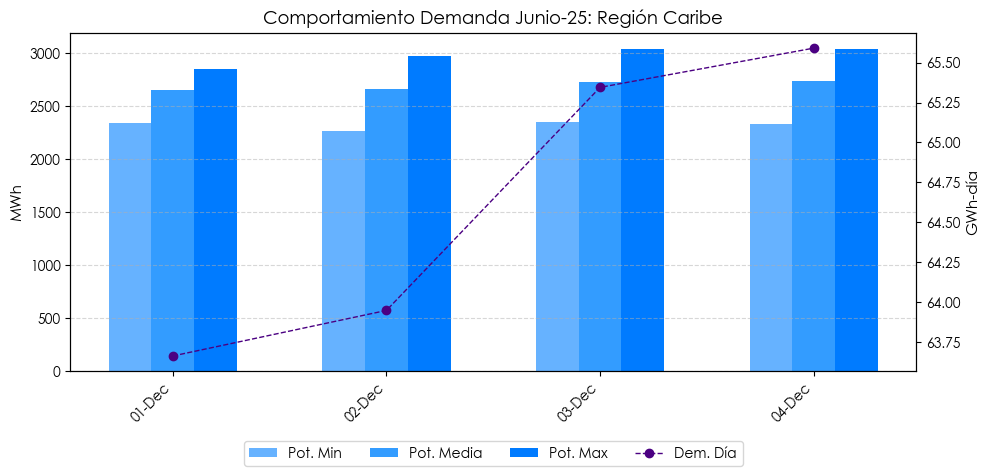

In [17]:
import matplotlib.pyplot as plt

# Copia y conversión de fechas
df = dft_demmerc.copy()
df['Date_'] = pd.to_datetime(df['Date_'])

# Filtrar desde el 1 de mayo de 2025
fecha_inicio = pd.to_datetime("2025-12-01")
df = df[df['Date_'] >= fecha_inicio].copy()

# Convertir kWh a GWh
df['max_GWh'] = df['DemCaribe_kwh_max'] / 1_000
df['min_GWh'] = df['DemCaribe_kwh_min'] / 1_000
df['mean_GWh'] = df['DemCaribe_kwh_mean'] / 1_000
df['sum_GWh'] = df['DemCaribe_kwh_sum'] / 1_000_000

# Etiquetas para eje x
etiquetas = df['Date_'].dt.strftime('%d-%b')

# Colores
color_max = '#007BFF'   # Azul moderno (max)
color_min = '#66B2FF'   # Azul claro armonioso (min)
color_mean = '#339CFF'  # Azul intermedio (mean)
color_linea = '#4B0082' # Morado (línea suma)

# Fuente
font = {'fontname': 'Century Gothic'}

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()  # Eje secundario

x = range(len(df))
bar_width = 0.2

# Barras en el eje primario en orden min, mean, max
ax.bar([i - bar_width for i in x], df['min_GWh'], width=bar_width, label='Pot. Min', color=color_min)
ax.bar(x, df['mean_GWh'], width=bar_width, label='Pot. Media', color=color_mean)
ax.bar([i + bar_width for i in x], df['max_GWh'], width=bar_width, label='Pot. Max', color=color_max)

# Línea en el eje secundario, color negro para texto y ticks
ax2.plot(x, df['sum_GWh'], color=color_linea, marker='o', label='Dem. Día', linewidth=1,linestyle='--')

# Configuración de ejes
ax.set_xticks(x)
ax.set_xticklabels(etiquetas, rotation=45, ha='right', **font)

ax.set_ylabel("MWh", fontsize=11, **font)
ax2.set_ylabel("GWh-día", fontsize=11, **font, color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax.set_title("Comportamiento Demanda Junio-25: Región Caribe", fontsize=13, **font)

# Leyenda combinada abajo
bars_labels = ax.get_legend_handles_labels()
line_labels = ax2.get_legend_handles_labels()
handles = bars_labels[0] + line_labels[0]
labels = bars_labels[1] + line_labels[1]

plt.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=5, prop={'family': 'Century Gothic'})

# Grilla y presentación
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


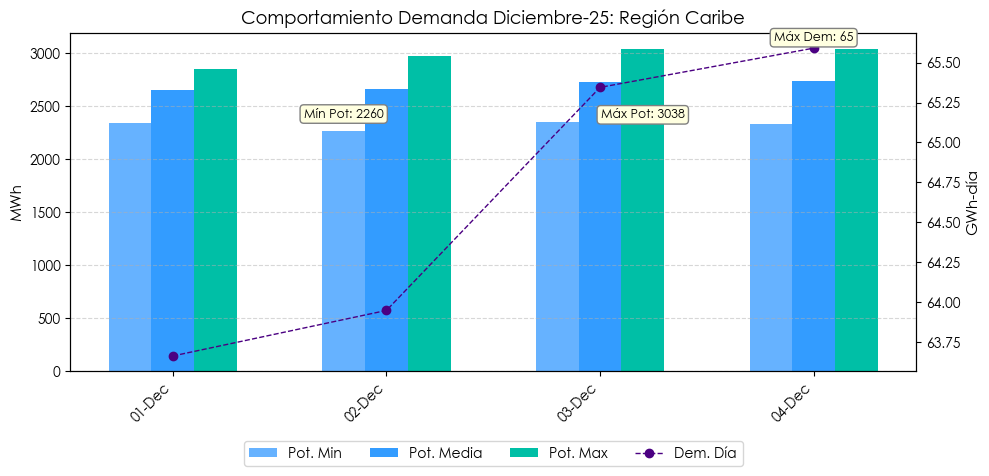

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Copia y conversión de fechas
df = dft_demmerc.copy()
df['Date_'] = pd.to_datetime(df['Date_'])

# Filtrar desde el 1 de mayo de 2025
fecha_inicio = pd.to_datetime("2025-12-01")
df = df[df['Date_'] >= fecha_inicio].copy()

# Convertir kWh a GWh o MWh (según tu código)
df['max_GWh'] = df['DemCaribe_kwh_max'] / 1_000
df['min_GWh'] = df['DemCaribe_kwh_min'] / 1_000
df['mean_GWh'] = df['DemCaribe_kwh_mean'] / 1_000
df['sum_GWh'] = df['DemCaribe_kwh_sum'] / 1_000_000

# Etiquetas para eje x
etiquetas = df['Date_'].dt.strftime('%d-%b')

# Colores ejecutivos con estilo pastel y acento en max
color_max   = '#00BFA6'  # Verde base vibrante (max)
color_min = '#66B2FF'   # Azul claro armonioso (min)
color_mean = '#339CFF'  # Azul intermedio (mean)
color_linea  = '#4B0082'  # Morado profundo (línea suma)

# Fuente
font = {'fontname': 'Century Gothic'}

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()  # Eje secundario

x = range(len(df))
bar_width = 0.2

# Barras en el eje primario en orden min, mean, max
ax.bar([i - bar_width for i in x], df['min_GWh'], width=bar_width, label='Pot. Min', color=color_min)
ax.bar(x, df['mean_GWh'], width=bar_width, label='Pot. Media', color=color_mean)
ax.bar([i + bar_width for i in x], df['max_GWh'], width=bar_width, label='Pot. Max', color=color_max)

# Línea en el eje secundario
ax2.plot(x, df['sum_GWh'], color=color_linea, marker='o', label='Dem. Día', linewidth=1, linestyle='--')

# --- Etiquetas sin flechas, con fondo, sin decimales ---

# Potencia máxima (Pot. Max) — en el centro de la barra correspondiente (día donde se presenta)
idx_pot_max = df['max_GWh'].idxmax()
x_pot_max = df.index.get_loc(idx_pot_max) + bar_width  # posición central barra max (índice + bar_width)
y_pot_max = df.loc[idx_pot_max, 'max_GWh']
ax.annotate(f'Máx Pot: {int(y_pot_max)}',
            xy=(x_pot_max, y_pot_max),
            xytext=(0, -50), textcoords='offset points',  # bajamos la etiqueta 0.5 unidades
            ha='center', fontsize=9, color='black',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", edgecolor="gray"))

# Potencia mínima (Pot. Min)
idx_pot_min = df['min_GWh'].idxmin()
x_pot_min = df.index.get_loc(idx_pot_min) - bar_width
y_pot_min = df.loc[idx_pot_min, 'min_GWh']
ax.annotate(f'Mín Pot: {int(y_pot_min)}',
            xy=(x_pot_min, y_pot_min),
            xytext=(0, 10), textcoords='offset points',
            ha='center', fontsize=9, color='black',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", edgecolor="gray"))

# Demanda máxima (Dem. Día) — justo arriba del punto
idx_dem_max = df['sum_GWh'].idxmax()
x_dem_max = df.index.get_loc(idx_dem_max)
y_dem_max = df.loc[idx_dem_max, 'sum_GWh']
ax2.annotate(f'Máx Dem: {int(y_dem_max)}',
             xy=(x_dem_max, y_dem_max),
             xytext=(0, 5), textcoords='offset points',
             ha='center', fontsize=9, color='black',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", edgecolor="gray"))

# Configuración de ejes
ax.set_xticks(x)
ax.set_xticklabels(etiquetas, rotation=45, ha='right', **font)

ax.set_ylabel("MWh", fontsize=11, **font)
ax2.set_ylabel("GWh-día", fontsize=11, **font, color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax.set_title("Comportamiento Demanda Diciembre-25: Región Caribe", fontsize=13, **font)

# Leyenda combinada abajo
bars_labels = ax.get_legend_handles_labels()
line_labels = ax2.get_legend_handles_labels()
handles = bars_labels[0] + line_labels[0]
labels = bars_labels[1] + line_labels[1]

plt.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=5, prop={'family': 'Century Gothic'})

# Grilla y presentación
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [30]:
dft_demmerc.tail()

,Date_,DemCaribe_kwh_sum,DemCaribe_kwh_max,DemCaribe_kwh_min,DemCaribe_kwh_mean,pron_areas,DDEM
21,2025-11-22,68887170.22,3158328.67,2506259.26,2.870299e+06,68502.061157,68370.550
22,2025-11-23,65274879.29,3112619.94,2297892.64,2.719787e+06,66637.092178,66168.075
23,2025-11-24,69460744.01,3230400.34,2504739.62,2.894198e+06,69980.272696,69843.250
24,2025-11-25,69777368.15,3266557.70,2475524.95,2.907390e+06,70128.791454,69833.752
25,2025-11-26,70378753.66,3276265.09,2536255.47,2.932448e+06,70390.857269,70292.710


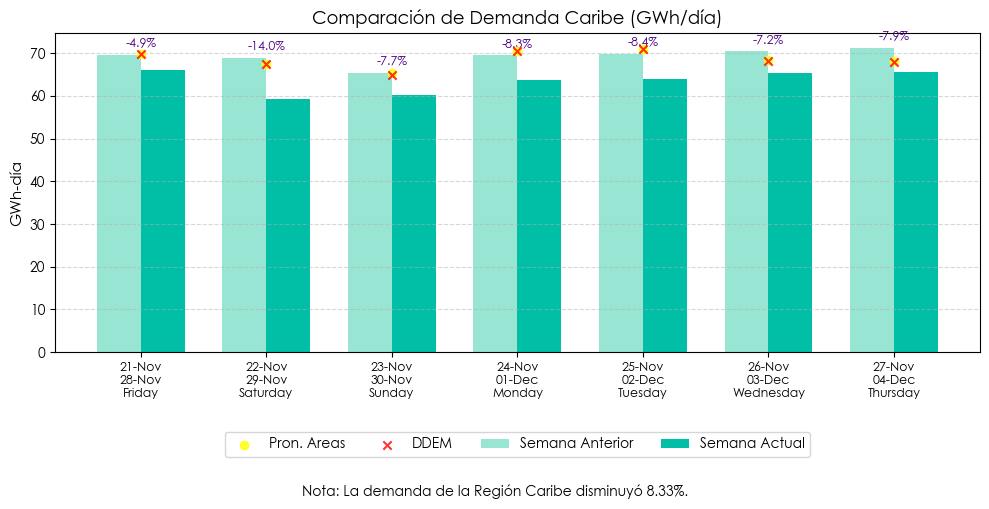

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime, timedelta

df = dft_demmerc.copy()

# Filtrar los últimos 14 días
df_filtrado = df.sort_values('Date_').tail(14).copy()

# Separar en semanas
semana_anterior = df_filtrado.iloc[:7].copy()
semana_actual = df_filtrado.iloc[7:].copy()

# Convertir a GWh
semana_anterior['GWh'] = semana_anterior['DemCaribe_kwh_sum'] / 1e6
semana_actual['GWh'] = semana_actual['DemCaribe_kwh_sum'] / 1e6
semana_actual['Pron'] = semana_actual['pron_areas'] / 1e3
semana_actual['DDEM'] = semana_actual['DDEM'] / 1e3

# Etiquetas eje X
etiquetas = [f"{d1.strftime('%d-%b')}\n{d2.strftime('%d-%b')}\n{d2.strftime('%A')}"
             for d1, d2 in zip(semana_anterior['Date_'], semana_actual['Date_'])]

# Colores
color_anterior = '#99E5D4'
color_actual   = '#00BFA6'
color_pron = '#4B0082'
color_pron_marker = 'yellow'
color_ddem_marker = 'red'

# Fuente
font = {'fontname': 'Century Gothic'}

# Gráfico
fig, ax = plt.subplots(figsize=(10, 5))
x = range(len(etiquetas))
bar_width = 0.35

# Barras
ax.bar([i - bar_width/2 for i in x], semana_anterior['GWh'], width=bar_width, color=color_anterior, label='Semana Anterior')
ax.bar([i + bar_width/2 for i in x], semana_actual['GWh'], width=bar_width, color=color_actual, label='Semana Actual')

# Variaciones porcentuales diarias
for i in x:
    ant = semana_anterior.iloc[i]['GWh']
    act = semana_actual.iloc[i]['GWh']
    if ant != 0:
        pct = (act - ant) / ant * 100
        ax.text(i, max(act, ant) + 1.5, f"{pct:+.1f}%", ha='center', va='bottom', fontsize=9, color=color_pron, **font)

# Pronóstico y DDEM
ax.scatter(x, semana_actual['Pron'], color=color_pron_marker, marker='o', label='Pron. Areas', alpha=0.8, zorder=5)
ax.scatter(x, semana_actual['DDEM'], color=color_ddem_marker, marker='x', label='DDEM', alpha=0.8, zorder=5)

# Total variación semanal
suma_ant = semana_anterior['GWh'].sum()
suma_act = semana_actual['GWh'].sum()
pct_total = (suma_act - suma_ant) / suma_ant * 100
texto_nota = f"Nota: La demanda de la Región Caribe {'aumentó' if pct_total > 0 else 'disminuyó'} {abs(pct_total):.2f}%."

# Configurar ejes y texto
ax.set_xticks(x)
ax.set_xticklabels(etiquetas, fontsize=9, **font)
ax.set_ylabel("GWh-día", fontsize=11, **font)
ax.set_title("Comparación de Demanda Caribe (GWh/día)", fontsize=13, **font)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Leyenda y nota
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=4, prop={'family': 'Century Gothic'})
plt.figtext(0.5, -0.002, texto_nota, ha='center', fontsize=10, fontname='Century Gothic', color='black')

# Grilla y presentación
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [22]:
pron = dft_demmerc.copy()
pron = pron.tail(4)
pron['DemCaribe_kwh_sum'].mean()

np.float64(64636466.2625)

In [24]:
pron = dft_demsis.copy()
pron = pron.tail(4)
pron['DemSist_kwh_2025'].mean()

np.float64(146663420.7425)

In [27]:
dft_demsis.tail(6)

,Date,DemSist_kwh_2025,Pron_sin,DDEM,DemSist_kwh_2024
303,01-Dec,2.324514e+08,238620.414376,238939.73,2.187018e+08
304,02-Dec,2.376975e+08,242781.937765,243285.70,2.426060e+08
305,03-Dec,2.414289e+08,243746.306402,240930.21,2.455696e+08
306,04-Dec,2.416840e+08,244189.339260,240807.00,2.473278e+08
307,05-Dec,4.967570e+07,243177.439013,242700.42,2.473625e+08
308,06-Dec,5.386510e+07,230134.433373,231593.76,2.459550e+08


In [28]:
dft_demsis.to_csv('ppp_dsdv.csv')

In [22]:
pron = dft_demmerc.copy()
pron = pron.tail(9)
pron['DemCaribe_kwh_sum'].mean()

np.float64(68544798.26222223)